# Objective

Build a classification model that predicts heart disease in a subject. (Note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease)
Attributes:

    male: male(0) or female(1);(Nominal)
    age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    education
    currentSmoker: whether or not the patient is a current smoker (Nominal)
    cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)
    BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
    prevalentHyp: whether or not the patient was hypertensive (Nominal)
    diabetes: whether or not the patient had diabetes (Nominal)
    totChol: total cholesterol level (Continuous)
    sysBP: systolic blood pressure (Continuous)
    diaBP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    glucose: glucose level (Continuous)
    10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable


In [23]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab 
%matplotlib inline


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import KNNImputer


In [24]:
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [26]:
df.columns.nunique()

16

# Handle missing values, Outliers and Duplicate Data

In [27]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [28]:
# we can drop education as it doesnt effect heart disease
df = df.drop(['education'], axis=1)

In [29]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [31]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [32]:
df['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [33]:
df['BPMeds'].mode()

0    0.0
Name: BPMeds, dtype: float64

In [34]:
df['BPMeds'].fillna("?")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4235      ?
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: BPMeds, Length: 4240, dtype: object

In [35]:
df['BPMeds'].replace("?",0,inplace=True)

In [36]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Handling Missing Values Used KNNImputer

In [38]:
knn_obj = KNNImputer()
arr = knn_obj.fit_transform(df)
df2 = pd.DataFrame(arr,columns=df.columns)

In [39]:
df2

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,1.0,20.0,0.2,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0
4237,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [40]:
df2.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [41]:
df2.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.007736,0.029670,0.005896,0.310613,0.025708,236.716745,132.354599,82.897759,25.801275,75.880047,81.877783,0.151887
std,0.495027,8.572942,0.500024,11.887927,0.168747,0.076569,0.462799,0.158280,44.370539,22.033300,11.910394,4.072485,12.024130,22.999013,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,86.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# To Detect OUTLIERS

<AxesSubplot:>

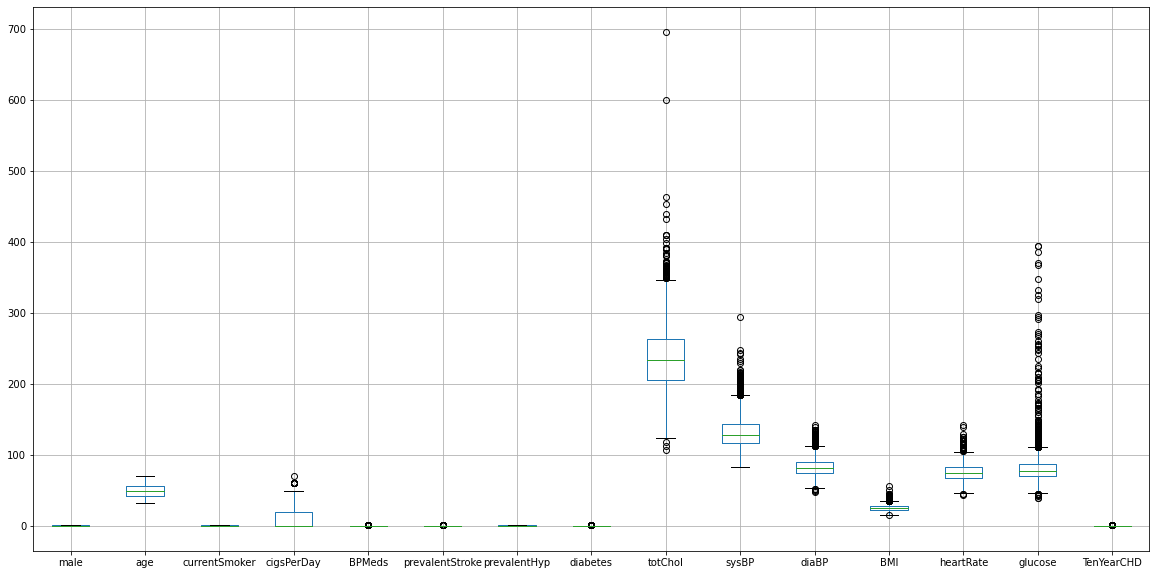

In [42]:
df.boxplot(figsize=(20,10))

# How to Handle Outliers Using IQR Method

In [44]:
df2['cigsPerDay'].value_counts().sum()

4240

In [70]:
    def fun_iqr(col):
        q1=col.quantile(0.25)
        q2=col.quantile(0.50)
        q3=col.quantile(0.75)
        iqr=q3-q2
        upper_tail=q3+iqr*1.5
        lower_tail=q1-iqr*1.5
        col.loc[col>upper_tail]=col.loc[col<upper_tail].median()
        col.loc[col<lower_tail]=col.loc[col<lower_tail].median()

In [57]:
fun_iqr(df2["cigsPerDay"])

<AxesSubplot:>

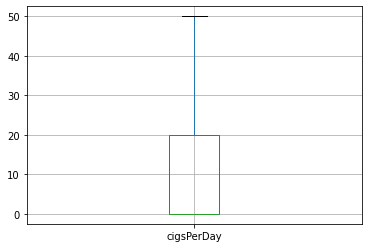

In [58]:
df2.boxplot("cigsPerDay")

# Observations:

    It's weird that patients who didn't smoke suffered from CHD
    More the cigarretes they smoke higher chance of getting CHD


In [59]:
df2['totChol'].value_counts().sum()

4240

<AxesSubplot:>

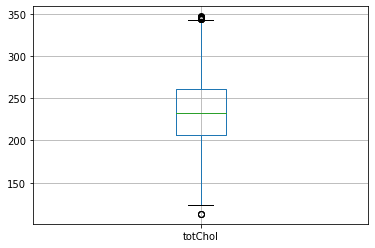

In [60]:
df2.boxplot("totChol")

In [61]:
fun_iqr(df2['totChol'])

<AxesSubplot:>

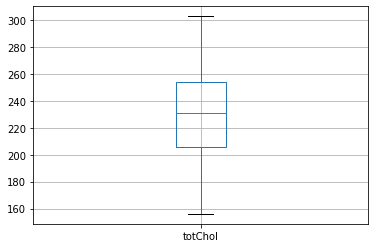

In [64]:
df2.boxplot("totChol")

<AxesSubplot:>

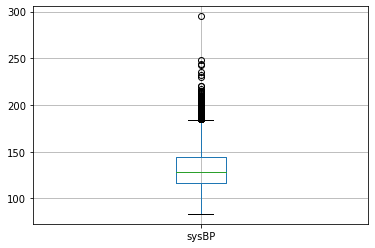

In [65]:
df2.boxplot("sysBP")

In [73]:
fun_iqr(df2["sysBP"])

<AxesSubplot:>

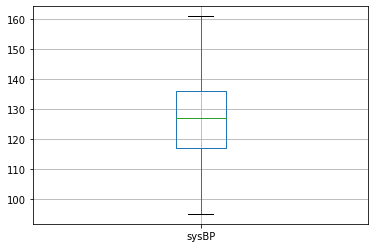

In [74]:
df2.boxplot("sysBP")

<AxesSubplot:>

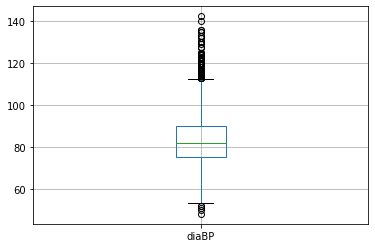

In [75]:
df2.boxplot("diaBP")

In [76]:
fun_iqr(df2["diaBP"])

<AxesSubplot:>

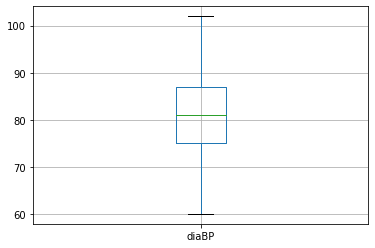

In [77]:
df2.boxplot("diaBP")

# Observations:

    Patients who have higher diastole BP have higher chances of getting CHD
    Patients whose diastole BP is around 75-80 are mostly safe


<AxesSubplot:>

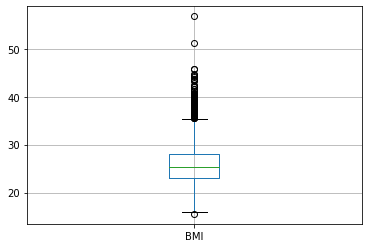

In [78]:
df2.boxplot("BMI")

In [79]:
fun_iqr(df2["BMI"])

<AxesSubplot:>

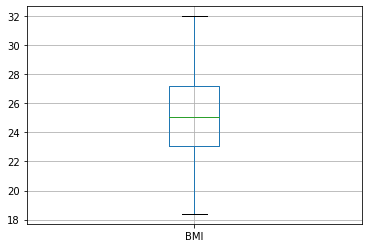

In [80]:
df2.boxplot("BMI")

# Observations:

    It seems BMI doesn't affect chance of getting CHD


<AxesSubplot:>

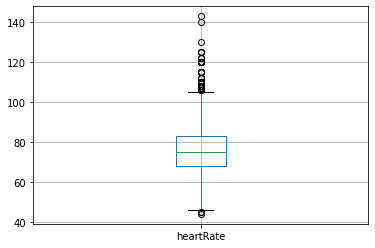

In [81]:
df2.boxplot("heartRate")

In [82]:
fun_iqr(df2["heartRate"])

<AxesSubplot:>

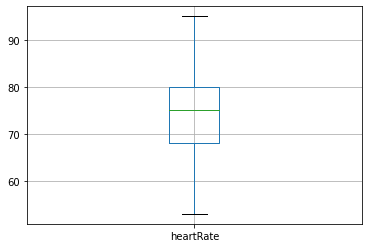

In [83]:
df2.boxplot("heartRate")


# Observations:

    If your heart rate is in range of 70-80 is safe, but if their heart rate goes above or below can cause CHD


<AxesSubplot:>

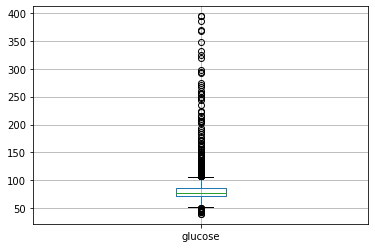

In [84]:
df2.boxplot("glucose")

In [85]:
fun_iqr(df2["glucose"])

<AxesSubplot:>

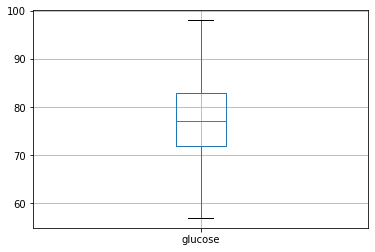

In [86]:
df2.boxplot("glucose")

# Observations:

    In diabetic patients those having higher level of glucose ranging from 200-400, have higher risk of getting CHD".


<AxesSubplot:>

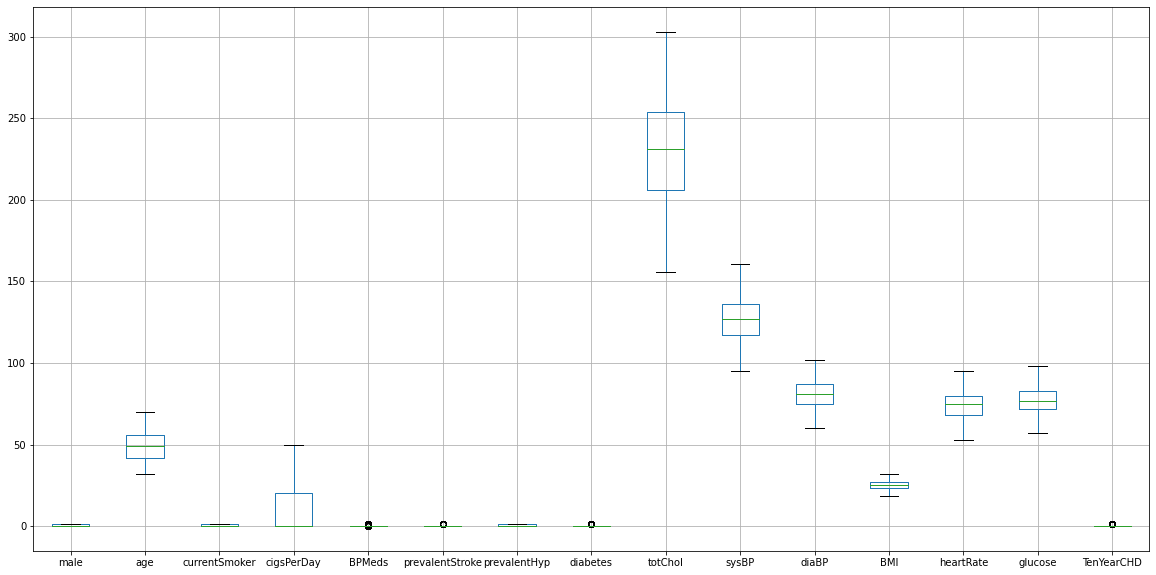

In [89]:
df2.boxplot(figsize=(20,10))

# Observations:

    We see that most of smokers having no risk of CHD are in age around 40 years
    most of non-smokers having risk are in age around 65-70 years
    most smokers having risk are in age around 50 years
    Observations:

    Higher sysBP and diaBP, higher the risk of Hypertension, which means higher risk of CHD



# Feature Selection

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.
Observations:

We can say the all columns have important features in the data .


# Feature Scalling

In [90]:
# Check first data is normally distributed or not

In [93]:
       
from scipy.stats import shapiro
_,p_value = shapiro(df2)
if p_value<0.05:
    print("data is not normally distributed")
else:    
        print(" normally distributed")

data is not normally distributed


C:\Users\shaik\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [94]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_df= pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

In [96]:
scaled_df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,0.462637,0.494104,0.176711,0.029670,0.005896,0.310613,0.025708,0.500651,0.485318,0.502544,0.494898,0.503602,0.493901,0.151887
std,0.495027,0.225604,0.500024,0.231428,0.168747,0.076569,0.462799,0.158280,0.231638,0.218155,0.221664,0.222411,0.227145,0.214172,0.358953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340136,0.333333,0.357143,0.344416,0.357143,0.365854,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510204,0.484848,0.500000,0.492285,0.523810,0.487805,0.000000
75%,1.000000,0.631579,1.000000,0.400000,0.000000,0.000000,1.000000,0.000000,0.666667,0.621212,0.642857,0.648788,0.642857,0.634146,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Traing and testing Data

In [97]:
y = scaled_df['TenYearCHD']
X = scaled_df.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)


# Models
The algorithms that we will be used are:

   1) Logistic Regression
   2) Decision Trees
    3) Support Vector Machine
   4) Random Forest Classification

# 1. Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.


In [98]:
#initialize model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_logreg_pred = logreg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_logreg_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_logreg_pred)
print(f"The f1 score for LogisticRegression is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_logreg_pred)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_logreg_pred)
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")


The accuracy score for LogisticRegression is: 84.39999999999999%
The f1 score for LogisticRegression is: 5.0%
The precision score for LogisticRegression is: 77.8%
The recall score for LogisticRegression is: 2.6%


# 2) Decision Trees

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels

In [99]:
#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_up_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_up_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_up_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_up_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_up_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 73.6%
The f1 score for DTC is: 20.0%
The precision score for DTC is: 19.2%
The recall score for DTC is: 20.8%


# 3) Support vector Machine¶

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.


In [100]:
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

Observations:
The accuracy score for SVM is: 84.1%
The f1 score for SVM is: 0.7000000000000001%
The precision score for SVM is: 50.0%
The recall score for SVM is: 0.4%


# 4) Random Forest Classification

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.


In [101]:
rfc =  RandomForestClassifier()

#fit model
rfc.fit(X_train, y_train)

normalized_df_rfc_pred = rfc.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_rfc_pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_rfc_pred)
print(f"The f1 score for RFC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_rfc_pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_rfc_pred)
print(f"The recall score for RFC is: {round(recall,3)*100}%")

Observations:
The accuracy score for RFC is: 83.8%
The f1 score for RFC is: 3.5000000000000004%
The precision score for RFC is: 33.300000000000004%
The recall score for RFC is: 1.9%


# F1 Score

In [102]:
data = {'Model':['Logistic Regression','Decision Tree','SVM','Random Forest'],
        'F1 Score':[5.0,20.0,0.70,3.50],'Accuracies':[84.39,73.6,84.1,83.8],'Recall':[2.6,20.8,0.4,1.9],'Precision':[77.8,19.2,50.0,33.30]}



# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

                 Model  F1 Score  Accuracies  Recall  Precision
0  Logistic Regression       5.0       84.39     2.6       77.8
1        Decision Tree      20.0       73.60    20.8       19.2
2                  SVM       0.7       84.10     0.4       50.0
3        Random Forest       3.5       83.80     1.9       33.3


# Comparing the Models

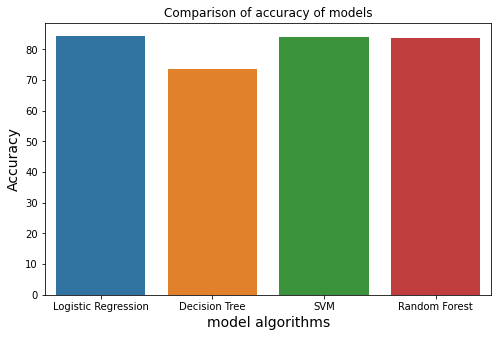

In [108]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="Accuracies",data=df)
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

# DATASET :

With the dataset that was provided, age was ranged 30-60 (majority), number of cigsperday() ranges 10-40(majority) ,sysBP ranges 100-200,glucose ranges 65-100(majority),totChol ranges 150-300.

The above mentioned are the important features that were given by the order of highest importance with the help of Feature Selection.



# FINAL RESULT :

The accuracy was observed the highest at Logistic Regression with -

    Accuracy of 84.39%
    f1 score of 5.0%
    Precision of 77.8%
    Recall of 2.6%.
    


Therefore Logistic Regression model is the recommended model

As observed by the visualizations,

    Age is directly proportional to the target variable (TenYearCHD)
    No: of cigs per day is a major factor for predicting the heart disease .
    Diabetic patients those having higher level of glucose ranging from 200-400, have higher risk of getting CHD.
    90% of stroke patients get CHD
    Patients who have higher systole BP have higher chances of getting CHD
    Patients whose diastole BP is around 75-80 are mostly safe